In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
df=sns.load_dataset("iris")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [3]:
df.shape

(150, 5)

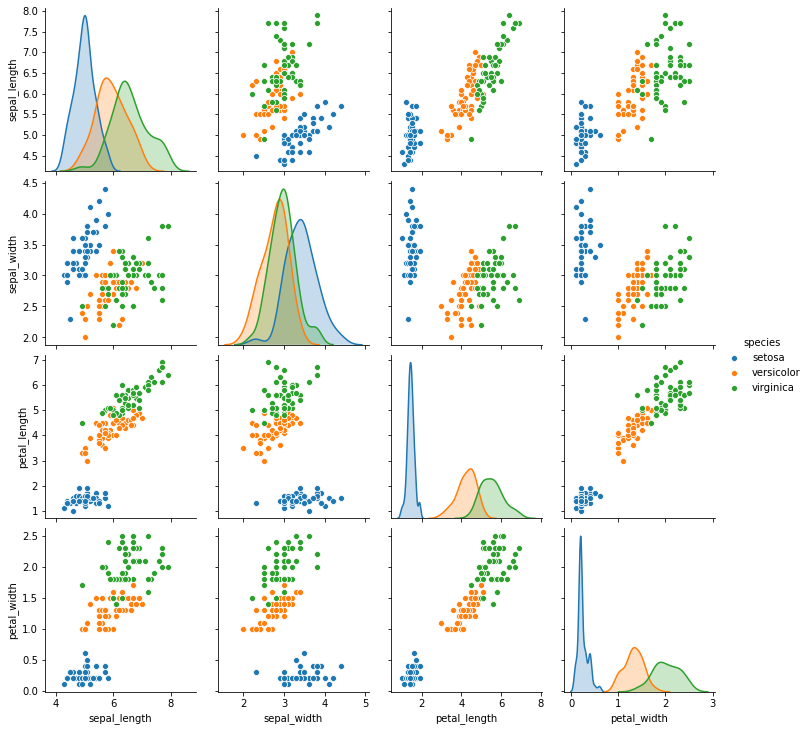

In [4]:
sns.pairplot(df, hue="species");

In [5]:
# Null deger var mi bakilir, varsa Null degerler drop yapilir.
df.isnull().sum().any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Transform Label Encoder

In [7]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

> modele yalniz float ve integer degerleri sokabiliriz, dolayisiyla 'origin' sutununu numerik degere donusturmeliyiz

> ['setosa', 'versicolor', 'virginica'] target degerlerimizdir. Dolayisiyla bunlari get_dummy yapamayiz. Label Encoder kullanalim.

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
model=LabelEncoder()
model.fit(df.species)

LabelEncoder()

In [10]:
model.transform(df.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
df['species']=model.transform(df.species)
df.sample(10)

sepal_length  sepal_width  petal_length  petal_width  species
136           6.3          3.4           5.6          2.4        2
106           4.9          2.5           4.5          1.7        2
105           7.6          3.0           6.6          2.1        2
7             5.0          3.4           1.5          0.2        0
129           7.2          3.0           5.8          1.6        2
135           7.7          3.0           6.1          2.3        2
42            4.4          3.2           1.3          0.2        0
139           6.9          3.1           5.4          2.1        2
74            6.4          2.9           4.3          1.3        1
30            4.8          3.1           1.6          0.2        0

# Split the Data

In [12]:
X=df.drop(["species"], axis=1)
y=df["species"]

In [13]:
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.4, random_state = 101)

# Training Model

> if target is continue we use LinearRegression

> if target is discreate we use LogisticRegression

> Our target have discreate values

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
# veriyi yüzdelik oranda temsil etme kabiliyeti
print(model.score(X,y)*100)

98.0


# Model Evaluate

In [20]:
# bo =interception
model.intercept_

array([  9.12687969,   1.10527328, -10.23215297])

In [21]:
# Coefficients= b1,b2,...,bn
model.coef_

array([[-0.45811562,  0.72220102, -2.08581652, -0.8474022 ],
       [ 0.5056132 , -0.26961108, -0.08750561, -0.87220986],
       [-0.04749758, -0.45258994,  2.17332213,  1.71961206]])

In [22]:
# # coefficientlari daha iyi gostermek icin DF yapiyoruz
# coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
# coeff_df

# Prediction

In [23]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1])

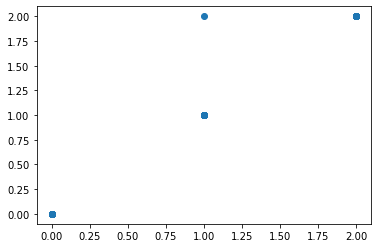

In [24]:
plt.scatter(y_test,y_pred);

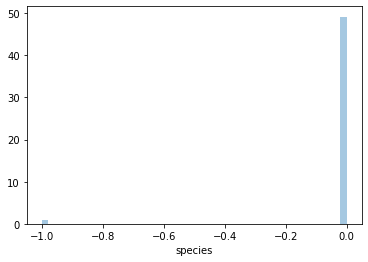

In [25]:
sns.distplot((y_test-y_pred), bins=50);

In [26]:
y_pred_train=model.predict(X_train)

# Evaluation Metrics

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    r2score = r2_score(actual, pred)
    print(f"R2 Score: {r2score}",
          f"Mean Absolute Error(MAE): {mae}",
          f"Mean Square Error(MSE): {mse}",
          f"Root Mean Square Error(RMSE): {rmse}",sep="\n")

In [29]:
eval_metrics(y_test, y_pred)

R2 Score: 0.9703557312252964
Mean Absolute Error(MAE): 0.016666666666666666
Mean Square Error(MSE): 0.016666666666666666
Root Mean Square Error(RMSE): 0.12909944487358055


In [30]:
eval_metrics(y_train, y_pred_train)

R2 Score: 0.9696151249155975
Mean Absolute Error(MAE): 0.022222222222222223
Mean Square Error(MSE): 0.022222222222222223
Root Mean Square Error(RMSE): 0.14907119849998599


# Comparison of Actual and Predictions

In [35]:
my_dict={"actual":y_test, "predicted":y_pred}
compare=pd.DataFrame(my_dict)
compare

actual  predicted
33        0          0
16        0          0
43        0          0
129       2          2
50        1          1
123       2          2
68        1          1
53        1          1
146       2          2
1         0          0
147       2          2
32        0          0
31        0          0
122       2          2
127       2          2
74        1          1
88        1          1
96        1          1
42        0          0
134       2          2
80        1          1
48        0          0
90        1          1
65        1          1
97        1          1
64        1          1
93        1          1
114       2          2
25        0          0
41        0          0
104       2          2
89        1          1
116       2          2
82        1          1
112       2          2
55        1          1
86        1          1
61        1          1
94        1          1
135       2          2
21        0          0
22        0          0
29        0          0
77        1          2
66        1          1
13        0          0
102       2          2
67        1          1
34        0          0
98        1          1
69        1          1
23        0          0
101       2          2
4         0          0
57        1          1
108       2          2
92        1          1
37        0          0
39        0          0
91        1          1

# Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import scikitplot.metrics as splt

In [68]:
results = confusion_matrix(compare.actual, compare.predicted)
print ('Confusion Matrix :\n',*results,sep='\n')

Confusion Matrix :

[19  0  0]
[ 0 25  1]
[ 0  0 15]


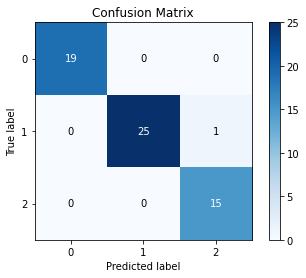

In [69]:
splt.plot_confusion_matrix(compare.actual, compare.predicted);

In [70]:
print ('Accuracy:',accuracy_score(compare.actual, compare.predicted))

Accuracy: 0.9833333333333333


In [71]:
print('Classification Report :\n',classification_report(compare.actual, compare.predicted))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.96      0.98        26
           2       0.94      1.00      0.97        15

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



# ROC Curve with scikitplot

In [72]:
# Olasılık değerlerinin hesaplanması
y_pred_proba = model.predict_proba(X_test)

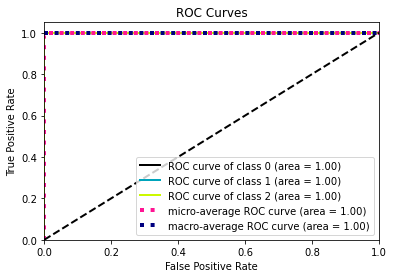

In [73]:
splt.plot_roc(y_test, y_pred_proba);